

---
***SET PROBLEMS***


---



**`Set Cover Problem`**

**Mathematical Formulation**:

Let $x_i$ be a binary decision variable for each subset $S_i$ in $S$, where $x_i = 1$ if $S_i$ is chosen in the cover, and $x_i = 0$ otherwise.

Objective function $f(C)$ to be minimized is the sum of the decision variables $x_i$:

$f(C) = \sum_{i=1}^{m} x_i$

Subject to the constraint that the union of the chosen sets must cover the entire universe $U$:

$\bigcup_{i=1}^{m} (x_i \cdot S_i) = U$ where "$\cdot$" represents the set intersection operation.

Additionally, there is a constraint on the size of the set cover:

$\sum_{i=1}^{m} x_i \leq k$

In [ ]:
import numpy as np
def set_cover_ant_colony(U, S, num_ants, num_iterations, pheromone_decay, alpha=1.0, beta=2.0, max_stagnation=20):
    num_elements = len(U)
    num_subsets = len(S)
    pheromones = np.ones(num_subsets)
    best_solution = None
    best_cost = float('inf')
    stagnation_count = 0
    for iteration in range(num_iterations):
        solutions = []
        costs = []
        for ant in range(num_ants):
            covered_elements = set()
            solution = []
            while len(covered_elements) < num_elements:
                probabilities = pheromones * (1.0 / (np.arange(1, num_subsets + 1) ** beta))
                probabilities /= probabilities.sum()
                chosen_subset = np.random.choice(np.arange(num_subsets), p=probabilities)
                solution.append(chosen_subset)
                covered_elements.update(S[chosen_subset])
            cost = len(solution)
            if cost < best_cost:
                best_solution = solution
                best_cost = cost
                stagnation_count = 0
            else:
                stagnation_count += 1
            solutions.append(solution)
            costs.append(cost)
        pheromones *= (1.0 - pheromone_decay)
        for i in range(num_ants):
            for subset in solutions[i]:
                pheromones[subset] += 1.0 / costs[i]
        if stagnation_count >= max_stagnation:
            break
    return best_solution, best_cost
U = set(range(1, 11))
S = [{1, 2, 3}, {4, 5, 6}, {7, 8, 9}, {1, 4, 7}, {2, 5, 8}, {3, 6, 9}, {10}]
num_ants = 10
num_iterations = 200
pheromone_decay = 0.1
best_solution, best_cost = set_cover_ant_colony(U, S, num_ants, num_iterations, pheromone_decay)
print("Best Solution =", best_solution)
print("Cost =", best_cost)

Best Solution = [2, 0, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 6]
Cost = 16


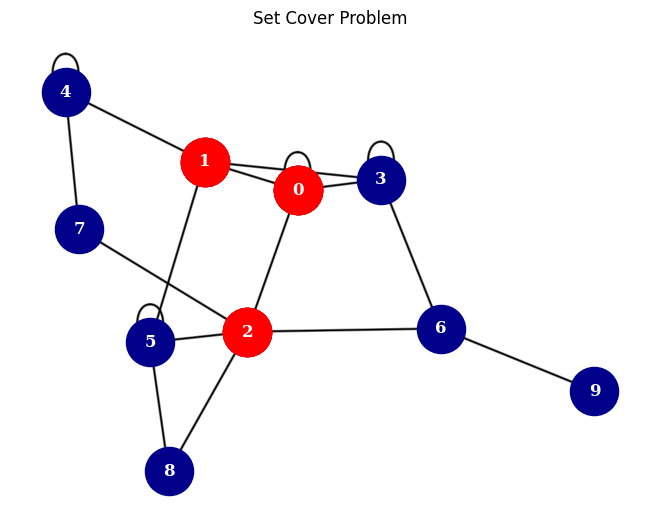

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
def set_cover_ant_colony(U, S, num_ants, num_iterations, pheromone_decay, alpha=1.0, beta=2.0, max_stagnation=20):
    num_elements = len(U)
    num_subsets = len(S)
    pheromones = np.ones(num_subsets)
    best_solution = None
    best_cost = float('inf')
    stagnation_count = 0
    for iteration in range(num_iterations):
        solutions = []
        costs = []
        for ant in range(num_ants):
            covered_elements = set()
            solution = []
            while len(covered_elements) < num_elements:
                probabilities = pheromones * (1.0 / (np.arange(1, num_subsets + 1) ** beta))
                probabilities /= probabilities.sum()
                chosen_subset = np.random.choice(np.arange(num_subsets), p=probabilities)
                solution.append(chosen_subset)
                covered_elements.update(S[chosen_subset])
            cost = len(solution)
            if cost < best_cost:
                best_solution = solution
                best_cost = cost
                stagnation_count = 0
            else:
                stagnation_count += 1
            solutions.append(solution)
            costs.append(cost)
        pheromones *= (1.0 - pheromone_decay)
        for i in range(num_ants):
            for subset in solutions[i]:
                pheromones[subset] += 1.0 / costs[i]
        if stagnation_count >= max_stagnation:
            break
    return best_solution, best_cost
def visualize_set_cover(U, S, solution):
    G = nx.Graph()
    for i, subset in enumerate(S):
        G.add_node(i, label=f"S{i+1}")
    for i, subset in enumerate(S):
        for element in subset:
            G.add_edge(i, element - 1)
    solution_nodes = [node for subset_index in solution for node in range(len(S[subset_index]))]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='darkblue', node_size=1200, font_color='white',font_family='serif', font_size='12')
    nx.draw_networkx_nodes(G, pos, nodelist=solution_nodes, node_color='red', node_size=1200)
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.5)
    labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Set Cover Problem")
    plt.show()
U = set(range(1, 11))
S = [{1, 2, 3}, {4, 5, 6}, {7, 8, 9}, {1, 4, 7}, {2, 5, 8}, {3, 6, 9}, {10}]
num_ants = 10
num_iterations = 200
pheromone_decay = 0.1
best_solution, best_cost = set_cover_ant_colony(U, S, num_ants, num_iterations, pheromone_decay)
visualize_set_cover(U, S, best_solution)

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 33 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

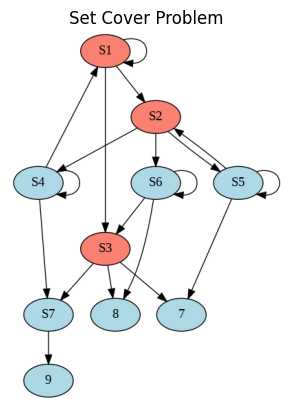

In [ ]:
import numpy as np
import pygraphviz as pgv
import matplotlib.pyplot as plt
def visualize_set_cover(U, S, solution):
    G = pgv.AGraph(strict=False, directed=True)
    for i, subset in enumerate(S):
        G.add_node(i, label=f"S{i+1}")
    for i, subset in enumerate(S):
        for element in subset:
            G.add_edge(i, element - 1)
    solution_nodes = [node for subset_index in solution for node in range(len(S[subset_index]))]
    G.node_attr['style'] = 'filled'
    G.node_attr['fillcolor'] = 'lightblue'
    G.edge_attr['color'] = 'black'
    for node in solution_nodes:
        G.get_node(node).attr['fillcolor'] = 'salmon'
    graph_file = "set_cover_problem_aco_soln.png"
    G.draw(graph_file, format='png', prog='dot')
    img = plt.imread(graph_file)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Set Cover Problem")
    plt.show()
U = set(range(1, 11))
S = [{1, 2, 3}, {4, 5, 6}, {7, 8, 9}, {1, 4, 7}, {2, 5, 8}, {3, 6, 9}, {10}]
num_ants = 10
num_iterations = 200
pheromone_decay = 0.1
best_solution, best_cost = set_cover_ant_colony(U, S, num_ants, num_iterations, pheromone_decay)
visualize_set_cover(U, S, best_solution)

**`Partition Problem`**

In [ ]:
import numpy as np
class AntColony:
    def __init__(self, num_ants, set, max_iter, pheromone_decay, alpha=1, beta=1):
        self.num_ants = num_ants
        self.set = set
        self.max_iter = max_iter
        self.pheromone_decay = pheromone_decay
        self.alpha = alpha
        self.beta = beta
        self.num_elements = len(set)
    def initialize_pheromones(self):
        return np.ones(self.num_elements)
    def ant_solution(self, pheromones):
        subset = []
        for i in range(self.num_elements):
            if np.random.rand() < pheromones[i]:
                subset.append(self.set[i])
        return subset
    def update_pheromones(self, pheromones, solutions):
        pheromones *= (1 - self.pheromone_decay)
        for solution in solutions:
            for element in solution:
                index = self.set.index(element)
                pheromones[index] += 1
    def solve(self):
        best_partition = None
        best_score = float('-inf')
        pheromones = self.initialize_pheromones()
        for _ in range(self.max_iter):
            solutions = [self.ant_solution(pheromones) for _ in range(self.num_ants)]
            scores = [sum(solution) for solution in solutions]
            local_best_score = max(scores)
            local_best_partition = solutions[scores.index(local_best_score)]
            if local_best_score > best_score:
                best_score = local_best_score
                best_partition = local_best_partition
            self.update_pheromones(pheromones, solutions)
        return best_partition
if __name__ == "__main__":
    input_set = [1, 5, 11, 5]
    num_ants = 10
    max_iterations = 100
    pheromone_decay = 0.1
    ant_colony = AntColony(num_ants, input_set, max_iterations, pheromone_decay)
    best_partition = ant_colony.solve()
    print("Best Partition =", best_partition)

Best Partition = [1, 5, 11, 5]


Best partition = [1, 5, 11, 5]


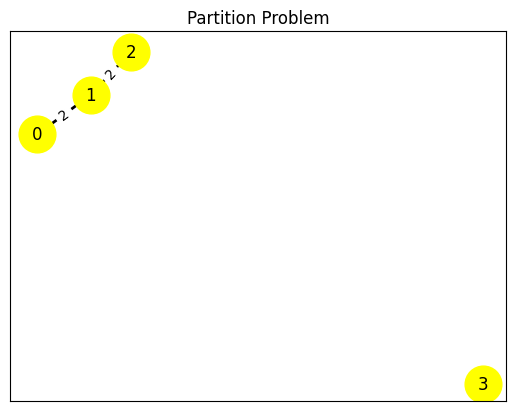

In [ ]:
import numpy as np
import networkx as nx
import pygraphviz as pgv
import matplotlib.pyplot as plt
class AntColony:
    def __init__(self, num_ants, set, max_iter, pheromone_decay, alpha=1, beta=1):
        self.num_ants = num_ants
        self.set = set
        self.max_iter = max_iter
        self.pheromone_decay = pheromone_decay
        self.alpha = alpha
        self.beta = beta
        self.num_elements = len(set)
    def initialize_pheromones(self):
        return np.ones(self.num_elements)
    def ant_solution(self, pheromones):
        subset = []
        for i in range(self.num_elements):
            if np.random.rand() < pheromones[i]:
                subset.append(self.set[i])
        return subset
    def update_pheromones(self, pheromones, solutions):
        pheromones *= (1 - self.pheromone_decay)
        for solution in solutions:
            for element in solution:
                index = self.set.index(element)
                pheromones[index] += 1
    def solve(self):
        best_partition = None
        best_score = float('-inf')
        pheromones = self.initialize_pheromones()
        solutions = []
        for _ in range(self.max_iter):
            current_solution = self.ant_solution(pheromones)
            current_score = sum(current_solution)
            solutions.append(current_solution)
            if current_score > best_score:
                best_score = current_score
                best_partition = current_solution
            self.update_pheromones(pheromones, [current_solution])
        return solutions, best_partition
    def visualize(self, solutions, best_partition):
        G = nx.Graph()
        for i in range(self.num_elements):
            G.add_node(i, label=str(self.set[i]))
        for ant_solution in solutions:
            for i in range(len(ant_solution) - 1):
                G.add_edge(self.set.index(ant_solution[i]), self.set.index(ant_solution[i + 1]), color='gray', weight=1)
        for i in range(len(best_partition) - 1):
            G.add_edge(self.set.index(best_partition[i]), self.set.index(best_partition[i + 1]), color='black', weight=2)
        pos = nx.spring_layout(G)
        labels = nx.get_edge_attributes(G, 'weight')
        edge_colors = nx.get_edge_attributes(G, 'color').values()
        nx.draw_networkx_nodes(G, pos, node_size=700, node_color='yellow')
        nx.draw_networkx_edges(G, pos, width=2, edge_color=edge_colors)
        nx.draw_networkx_labels(G, pos)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        plt.title("Partition Problem")
        plt.show()
if __name__ == "__main__":
    input_set = [1, 5, 11, 5]
    num_ants = 10
    max_iterations = 100
    pheromone_decay = 0.1
    ant_colony = AntColony(num_ants, input_set, max_iterations, pheromone_decay)
    all_solutions, best_partition = ant_colony.solve()
    print("Best partition =", best_partition)
    ant_colony.visualize(all_solutions, best_partition)

**`Weight Constrained Graph Tree Partition Problem`**

In [ ]:
import numpy as np
class AntColony:
    def __init__(self, graph, num_ants, alpha=1, beta=2, evaporation=0.5, Q=100):
        self.graph = graph
        self.pheromone = np.ones_like(graph) / len(graph)
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.evaporation = evaporation
        self.Q = Q
    def run(self, iterations):
        best_path = None
        best_cost = float('inf')
        for _ in range(iterations):
            paths = self.generate_paths()
            self.update_pheromone(paths)
            current_cost = self.get_path_cost(paths)
            if current_cost < best_cost:
                best_path = paths
                best_cost = current_cost
        return best_path, best_cost
    def generate_paths(self):
        paths = []
        for _ in range(self.num_ants):
            path = self.generate_path()
            paths.append(path)
        return paths
    def generate_path(self):
        path = []
        visited = set()
        current_node = np.random.choice(len(self.graph))
        visited.add(current_node)
        while len(visited) < len(self.graph):
            next_node = self.choose_next_node(current_node, visited)
            if next_node is not None:
                path.append((current_node, next_node))
                visited.add(next_node)
                current_node = next_node
            else:
                break
        return path
    def choose_next_node(self, current_node, visited):
        pheromone_values = self.pheromone[current_node, :]
        unvisited_nodes = [node for node in range(len(self.graph)) if node not in visited]
        if not unvisited_nodes:
            return None
        probabilities = pheromone_values[unvisited_nodes] ** self.alpha
        probabilities /= probabilities.sum()
        next_node = np.random.choice(unvisited_nodes, p=probabilities)
        return next_node
    def update_pheromone(self, paths):
        self.pheromone *= (1 - self.evaporation)
        for path in paths:
            cost = self.get_path_cost([path])
            for edge in path:
                self.pheromone[edge] += self.Q / cost
    def get_path_cost(self, paths):
        costs = [self.graph[edge] for path in paths for edge in path]
        return np.sum(costs)
num_nodes = int(input("Enter the number of nodes: "))
graph = np.zeros((num_nodes, num_nodes))
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        weight = int(input(f"Enter the weight for edge ({i}, {j}): "))
        graph[i, j] = weight
        graph[j, i] = weight
num_ants = int(input("Enter the number of ants: "))
aco = AntColony(graph, num_ants=num_ants)
best_path, best_cost = aco.run(iterations=100)
print("Best Path =", best_path)
print("Best Cost =", best_cost)

Enter the number of nodes: 4
Enter the weight for edge (0, 1): 2
Enter the weight for edge (0, 2): 3
Enter the weight for edge (0, 3): 4
Enter the weight for edge (1, 2): 5
Enter the weight for edge (1, 3): 6
Enter the weight for edge (2, 3): 7
Enter the number of ants: 4
Best Path = [[(2, 1), (1, 0), (0, 3)], [(1, 0), (0, 2), (2, 3)], [(3, 1), (1, 0), (0, 2)], [(3, 0), (0, 1), (1, 2)]]
Best Cost = 45.0


Enter the number of nodes: 4
Enter the weight for edge (0, 1): 12
Enter the weight for edge (0, 2): 23
Enter the weight for edge (0, 3): 43
Enter the weight for edge (1, 2): 37
Enter the weight for edge (1, 3): 75
Enter the weight for edge (2, 3): 22
Enter the number of ants: 7


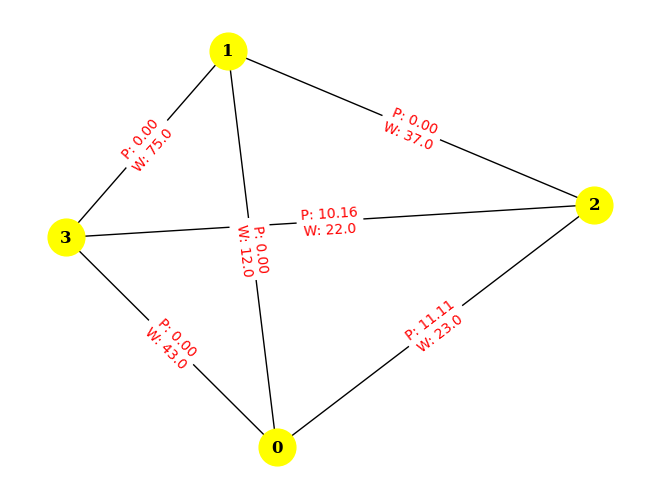

Best Path = [[(3, 2), (2, 1), (1, 0)], [(1, 0), (0, 3), (3, 2)], [(3, 2), (2, 0), (0, 1)], [(1, 0), (0, 2), (2, 3)], [(1, 0), (0, 3), (3, 2)], [(3, 2), (2, 1), (1, 0)], [(1, 0), (0, 3), (3, 2)]]
Best Cost = 487.0


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
class AntColony:
    def __init__(self, graph, num_ants, alpha=1, beta=2, evaporation=0.5, Q=100):
        self.graph = graph
        self.pheromone = np.ones_like(graph) / len(graph)
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.evaporation = evaporation
        self.Q = Q
    def run(self, iterations):
        best_path = None
        best_cost = float('inf')
        for _ in range(iterations):
            paths = self.generate_paths()
            self.update_pheromone(paths)
            current_cost = self.get_path_cost(paths)
            if current_cost < best_cost:
                best_path = paths
                best_cost = current_cost
        return best_path, best_cost
    def generate_paths(self):
        paths = []
        for _ in range(self.num_ants):
            path = self.generate_path()
            paths.append(path)
        return paths
    def generate_path(self):
        path = []
        visited = set()
        current_node = np.random.choice(len(self.graph))
        visited.add(current_node)
        while len(visited) < len(self.graph):
            next_node = self.choose_next_node(current_node, visited)
            if next_node is not None:
                path.append((current_node, next_node))
                visited.add(next_node)
                current_node = next_node
            else:
                break
        return path
    def choose_next_node(self, current_node, visited):
        pheromone_values = self.pheromone[current_node, :]
        unvisited_nodes = [node for node in range(len(self.graph)) if node not in visited]
        if not unvisited_nodes:
            return None
        probabilities = pheromone_values[unvisited_nodes] ** self.alpha
        probabilities /= probabilities.sum()
        next_node = np.random.choice(unvisited_nodes, p=probabilities)
        return next_node
    def update_pheromone(self, paths):
        self.pheromone *= (1 - self.evaporation)
        for path in paths:
            cost = self.get_path_cost([path])
            for edge in path:
                self.pheromone[edge] += self.Q / cost
    def get_path_cost(self, paths):
        costs = [self.graph[edge] for path in paths for edge in path]
        return np.sum(costs)
def visualize_graph_with_pheromones(graph, pheromones):
    G = nx.Graph()
    for i in range(len(graph)):
        G.add_node(i)
    for i in range(len(graph)):
        for j in range(i + 1, len(graph)):
            G.add_edge(i, j, weight=graph[i, j], pheromone=pheromones[i, j])
    pos = nx.spring_layout(G)
    edge_labels = {(i, j): f'P: {pheromones[i, j]:.2f}\nW: {graph[i, j]}' for i, j in G.edges}
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='yellow', font_color='black', font_family='serif')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.show()
num_nodes = int(input("Enter the number of nodes: "))
graph = np.zeros((num_nodes, num_nodes))
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        weight = int(input(f"Enter the weight for edge ({i}, {j}): "))
        graph[i, j] = weight
        graph[j, i] = weight
num_ants = int(input("Enter the number of ants: "))
aco = AntColony(graph, num_ants=num_ants)
best_path, best_cost = aco.run(iterations=100)
visualize_graph_with_pheromones(graph, aco.pheromone)
print("Best Path =", best_path)
print("Best Cost =", best_cost)

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 33 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

Enter the number of nodes:4
Enter the weight for edge (0, 1): 12
Enter the weight for edge (0, 2): 23
Enter the weight for edge (0, 3): 73
Enter the weight for edge (1, 2): 29
Enter the weight for edge (1, 3): 35
Enter the weight for edge (2, 3): 22
Enter the number of ants: 5


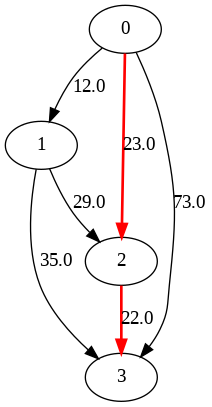

In [ ]:
import numpy as np
import pygraphviz as pgv
from IPython.display import Image
class AntColony:
    def __init__(self, graph, num_ants, alpha=1, beta=2, evaporation=0.5, Q=100):
        self.graph = graph
        self.pheromone = np.ones_like(graph) / len(graph)
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.evaporation = evaporation
        self.Q = Q
    def run(self, iterations):
        best_path = None
        best_cost = float('inf')
        for _ in range(iterations):
            paths = self.generate_paths()
            self.update_pheromone(paths)
            current_cost = self.get_path_cost(paths)
            if current_cost < best_cost:
                best_path = paths
                best_cost = current_cost
        return best_path, best_cost
    def generate_paths(self):
        paths = []
        for _ in range(self.num_ants):
            path = self.generate_path()
            paths.append(path)
        return paths
    def generate_path(self):
        path = []
        visited = set()
        current_node = np.random.choice(len(self.graph))
        visited.add(current_node)
        while len(visited) < len(self.graph):
            next_node = self.choose_next_node(current_node, visited)
            if next_node is not None:
                path.append((current_node, next_node))
                visited.add(next_node)
                current_node = next_node
            else:
                break
        return path
    def choose_next_node(self, current_node, visited):
        pheromone_values = self.pheromone[current_node, :]
        unvisited_nodes = [node for node in range(len(self.graph)) if node not in visited]
        if not unvisited_nodes:
            return None
        probabilities = pheromone_values[unvisited_nodes] ** self.alpha
        probabilities /= probabilities.sum()
        next_node = np.random.choice(unvisited_nodes, p=probabilities)
        return next_node
    def update_pheromone(self, paths):
        self.pheromone *= (1 - self.evaporation)
        for path in paths:
            cost = self.get_path_cost([path])
            for edge in path:
                self.pheromone[edge] += self.Q / cost
    def get_path_cost(self, paths):
        costs = [self.graph[edge] for path in paths for edge in path]
        return np.sum(costs)
def visualize_graph(graph, best_path):
    G = pgv.AGraph(directed=True)
    for i in range(len(graph)):
        G.add_node(i)
    for i in range(len(graph)):
        for j in range(i + 1, len(graph)):
            if graph[i, j] != 0:
                G.add_edge(i, j, label=str(graph[i, j]))
    if best_path:
        for path in best_path:
            for edge in path:
                try:
                    G.get_edge(edge[0], edge[1]).attr.update(color='red', penwidth=2)
                except KeyError:
                    pass
    file_path = "/content/graph.png"
    G.draw(file_path, format='png', prog='dot')
    return file_path
num_nodes = int(input("Enter the number of nodes:"))
graph = np.zeros((num_nodes, num_nodes))
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        weight = int(input(f"Enter the weight for edge ({i}, {j}): "))
        graph[i, j] = weight
        graph[j, i] = weight
num_ants = int(input("Enter the number of ants: "))
aco = AntColony(graph, num_ants=num_ants)
best_path, best_cost = aco.run(iterations=100)
file_path = visualize_graph(graph, best_path)
Image(file_path)

**`Arc-Weighted l-Cardinality Tree Problem`**

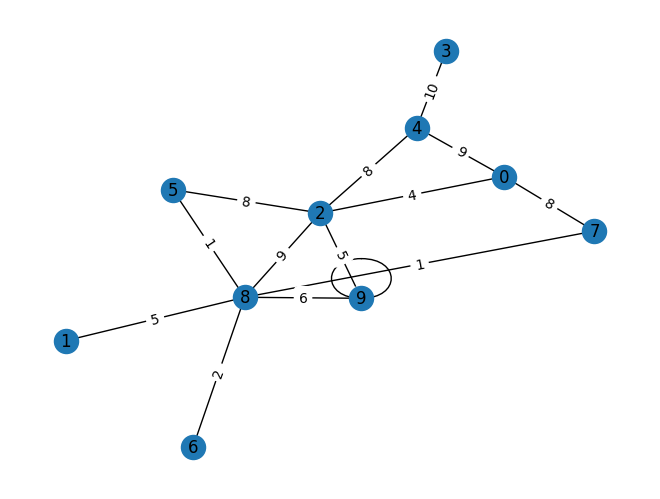

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math
def initialize_graph(num_nodes):
    G = nx.Graph()
    for i in range(num_nodes):
        G.add_node(i)
    return G
def add_random_edges(G, num_edges):
    for _ in range(num_edges):
        node1 = random.choice(list(G.nodes()))
        node2 = random.choice(list(G.nodes()))
        weight = random.randint(1, 10)
        G.add_edge(node1, node2, weight=weight)
    return G
def visualize_graph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()
def ant_colony_optimization(G, num_ants, num_iterations, evaporation_rate, alpha, beta):
    pheromone = 1 / len(G.edges())
    pheromone_matrix = {}
    for edge in G.edges():
        pheromone_matrix[edge] = pheromone
        pheromone_matrix[edge[::-1]] = pheromone
    best_solution = None
    best_cost = float('inf')
    for iteration in range(num_iterations):
        solutions = []
        costs = []
        for ant in range(num_ants):
            solution = []
            current_node = random.choice(list(G.nodes()))
            while len(solution) < len(G.nodes()):
                neighbors = list(G.neighbors(current_node))
                if not neighbors:
                    break
                probabilities = [
                    (pheromone_matrix[(current_node, neighbor)]**alpha) *
                    ((1 / G.get_edge_data(current_node, neighbor)['weight'])**beta)
                    for neighbor in neighbors
                ]
                total_probability = sum(probabilities)
                if total_probability == 0:
                    break
                probabilities = [prob / total_probability for prob in probabilities]
                next_node = random.choices(neighbors, probabilities)[0]
                solution.append((current_node, next_node))
                current_node = next_node
            cost = sum([G.get_edge_data(edge[0], edge[1])['weight'] for edge in solution])
            solutions.append(solution)
            costs.append(cost)
            if cost < best_cost:
                best_cost = cost
                best_solution = solution
        pheromone_matrix = {edge: (1 - evaporation_rate) * pheromone_matrix[edge] for edge in pheromone_matrix.keys()}
        for solution, cost in zip(solutions, costs):
            for edge in solution:
                if edge in pheromone_matrix:
                    pheromone_matrix[edge] += 1 / cost
    return best_solution, best_cost
def main():
    num_nodes = 10
    num_edges = 15
    num_ants = 5
    num_iterations = 50
    evaporation_rate = 0.1
    alpha = 1
    beta = 2
    G = initialize_graph(num_nodes)
    G = add_random_edges(G, num_edges)
    visualize_graph(G)
if __name__ == "__main__":
    main()

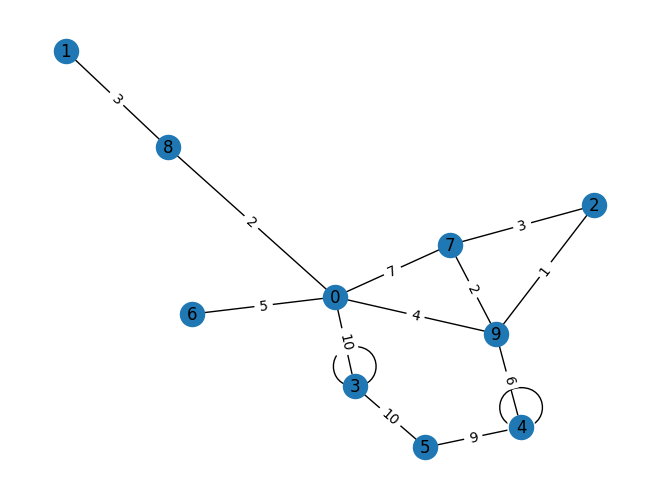

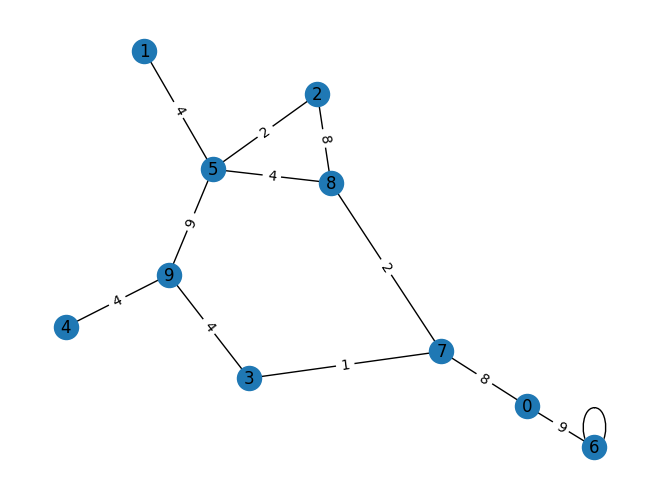

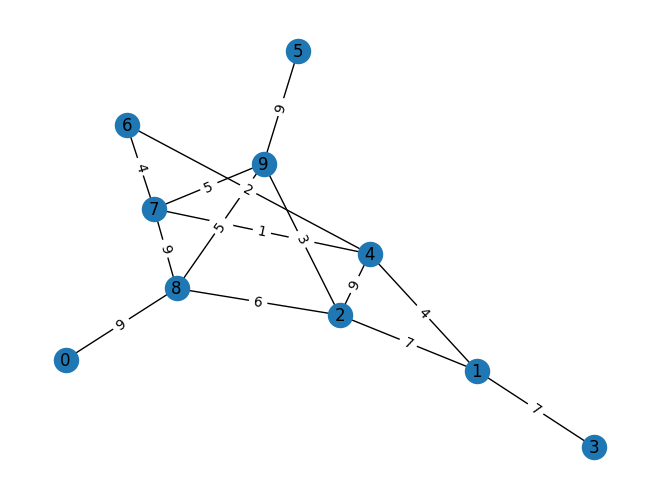

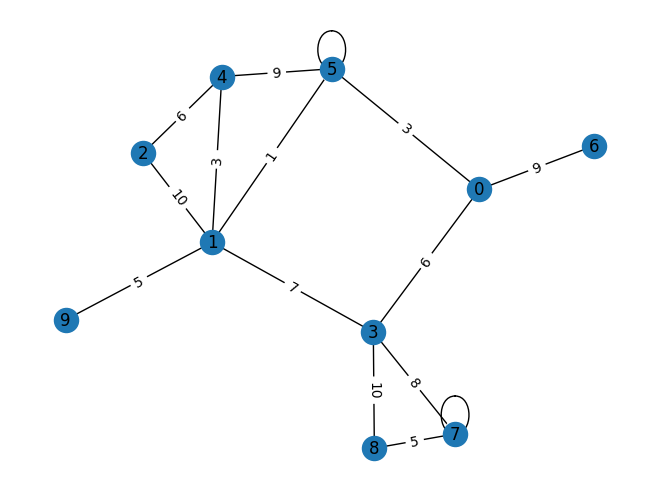

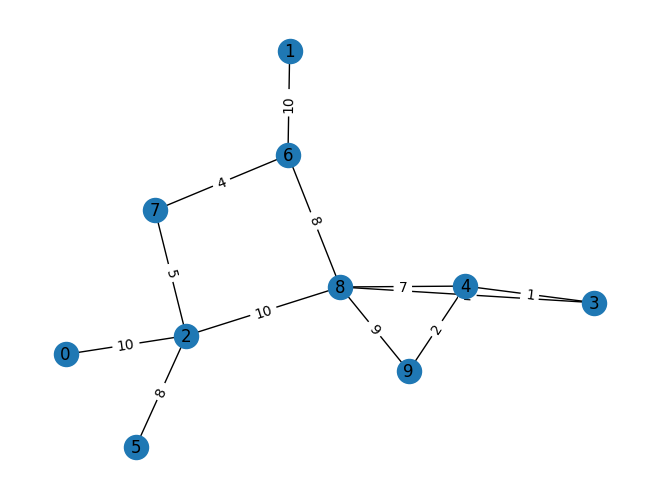

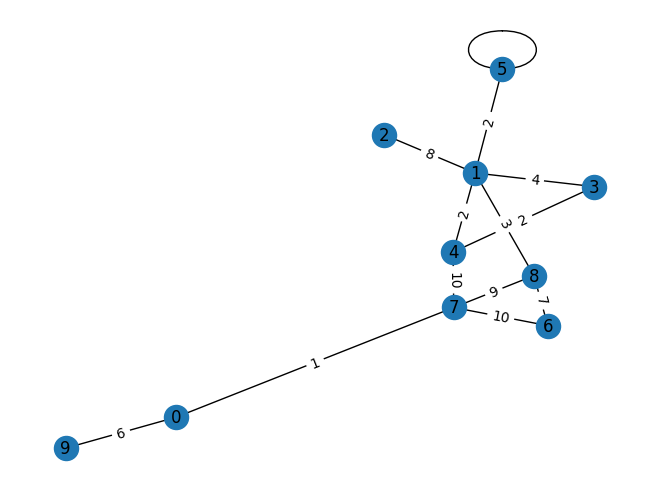

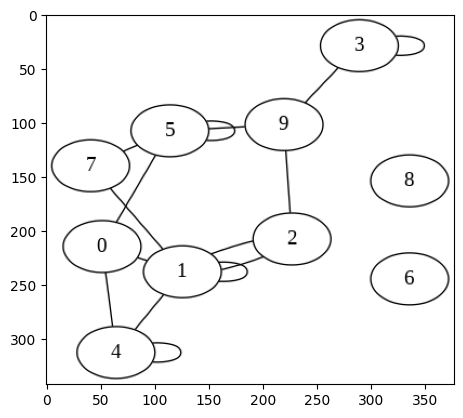

In [ ]:
import pygraphviz as pgv
import matplotlib.pyplot as plt
import random
def initialize_graph(num_nodes):
    G = pgv.AGraph(strict=False, directed=False)
    for i in range(num_nodes):
        G.add_node(i)
    return G
def add_random_edges(G, num_edges):
    for _ in range(num_edges):
        node1 = random.choice(list(G.nodes()))
        node2 = random.choice(list(G.nodes()))
        weight = random.randint(1, 10)
        G.add_edge(node1, node2, weight=str(weight))
    return G
def visualize_graph(G):
    G.layout(prog="neato")
    G.draw("AWlCTP_ACO_Solⁿ.png")
    img = plt.imread("AWlCTP_ACO_Solⁿ.png")
    plt.imshow(img)
    plt.show()
def ant_colony_optimization(G, num_ants, num_iterations, evaporation_rate, alpha, beta):
    pheromone = 1 / len(G.edges())
    pheromone_matrix = {}
    for edge in G.edges():
        pheromone_matrix[edge] = pheromone
        pheromone_matrix[edge[::-1]] = pheromone
    best_solution = None
    best_cost = float('inf')
    for iteration in range(num_iterations):
        solutions = []
        costs = []
        for ant in range(num_ants):
            solution = []
            current_node = random.choice(list(G.nodes()))
            while len(solution) < len(G.nodes()):
                neighbors = list(G.neighbors(current_node))
                if not neighbors:
                    break
                probabilities = [
                    (pheromone_matrix[(current_node, neighbor)]**alpha) *
                    ((1 / float(G.get_edge(current_node, neighbor).attr['weight']))**beta)
                    for neighbor in neighbors
                ]
                total_probability = sum(probabilities)
                if total_probability == 0:
                    break
                probabilities = [prob / total_probability for prob in probabilities]
                next_node = random.choices(neighbors, probabilities)[0]
                solution.append((current_node, next_node))
                current_node = next_node
            cost = sum([float(G.get_edge(edge[0], edge[1]).attr['weight']) for edge in solution])
            solutions.append(solution)
            costs.append(cost)
            if cost < best_cost:
                best_cost = cost
                best_solution = solution
        pheromone_matrix = {edge: (1 - evaporation_rate) * pheromone_matrix[edge] for edge in pheromone_matrix.keys()}
        for solution, cost in zip(solutions, costs):
            for edge in solution:
                if edge in pheromone_matrix:
                    pheromone_matrix[edge] += 1 / cost
    return best_solution, best_cost
def main():
    num_nodes = 10
    num_edges = 15
    num_ants = 5
    num_iterations = 50
    evaporation_rate = 0.1
    alpha = 1
    beta = 2
    G = initialize_graph(num_nodes)
    G = add_random_edges(G, num_edges)
    visualize_graph(G)
if __name__ == "__main__":
    main()

**`Multiple Knapsack Problem`**

In [ ]:
import numpy as np
def ant_colony_optimization(num_ants, num_iterations, alpha, beta, rho, q0, weights, values, capacities):
    num_items = len(weights)
    num_knapsacks = len(capacities)
    pheromones = np.ones((num_items, num_knapsacks))
    best_solution = None
    best_value = float('-inf')
    for iteration in range(num_iterations):
        solutions = []
        values_per_ant = []
        for ant in range(num_ants):
            solution = construct_solution(alpha, beta, q0, pheromones, weights, values, capacities)
            value = evaluate_solution(solution, values)
            solutions.append(solution)
            values_per_ant.append(value)
            if value > best_value:
                best_solution = solution
                best_value = value
        update_pheromones(pheromones, solutions, values_per_ant, rho)
    return best_solution, best_value
def construct_solution(alpha, beta, q0, pheromones, weights, values, capacities):
    num_items = len(weights)
    num_knapsacks = len(capacities)
    solution = np.zeros((num_items, num_knapsacks))
    for item in range(num_items):
        knapsack_probabilities = calculate_knapsack_probabilities(alpha, beta, q0, pheromones[item, :], weights[item], capacities)
        if np.random.rand() < q0:
            selected_knapsack = np.argmax(knapsack_probabilities)
        else:
            selected_knapsack = np.random.choice(num_knapsacks, p=knapsack_probabilities)
        solution[item, selected_knapsack] = 1
    return solution
def calculate_knapsack_probabilities(alpha, beta, q0, pheromone_values, weight, capacities):
    num_knapsacks = len(capacities)
    visibility = np.array([1 / (1 + weight / capacity) for capacity in capacities])
    probability_numerator = np.power(pheromone_values, alpha) * np.power(visibility, beta)
    probability_denominator = np.sum(probability_numerator)
    knapsack_probabilities = probability_numerator / probability_denominator
    return knapsack_probabilities
def evaluate_solution(solution, values):
    return np.sum(solution * values.reshape(-1, 1))
def update_pheromones(pheromones, solutions, values, rho):
    num_items, num_knapsacks = pheromones.shape
    pheromones *= (1 - rho)
    best_ant_index = np.argmax(values)
    best_solution = solutions[best_ant_index]
    for item in range(num_items):
        for knapsack in range(num_knapsacks):
            if best_solution[item, knapsack] == 1:
                pheromones[item, knapsack] += 1 / values[best_ant_index]
num_items = int(input("Enter the number of items: "))
weights = np.array([float(input(f"Enter the weight of item {i + 1}: ")) for i in range(num_items)])
values = np.array([float(input(f"Enter the value of item {i + 1}: ")) for i in range(num_items)])
num_knapsacks = int(input("Enter the number of knapsacks: "))
capacities = np.array([float(input(f"Enter the capacity of knapsack {j + 1}: ")) for j in range(num_knapsacks)])
num_ants = int(input("Enter the number of ants: "))
num_iterations = int(input("Enter the number of iterations: "))
alpha = float(input("Enter the alpha parameter: "))
beta = float(input("Enter the beta parameter: "))
rho = float(input("Enter the rho parameter: "))
q0 = float(input("Enter the q0 parameter: "))
best_solution, best_value = ant_colony_optimization(num_ants, num_iterations, alpha, beta, rho, q0, weights, values, capacities)
print("Best Value =", best_value)

Enter the number of items: 4
Enter the weight of item 1: 2
Enter the weight of item 2: 4
Enter the weight of item 3: 3
Enter the weight of item 4: 6
Enter the value of item 1: 2
Enter the value of item 2: 5
Enter the value of item 3: 6
Enter the value of item 4: 7
Enter the number of knapsacks: 4
Enter the capacity of knapsack 1: 3
Enter the capacity of knapsack 2: 5
Enter the capacity of knapsack 3: 7
Enter the capacity of knapsack 4: 5
Enter the number of ants: 4
Enter the number of iterations: 10
Enter the alpha parameter: 4
Enter the beta parameter: 7
Enter the rho parameter: 9
Enter the q0 parameter: 3
Best Value = 20.0


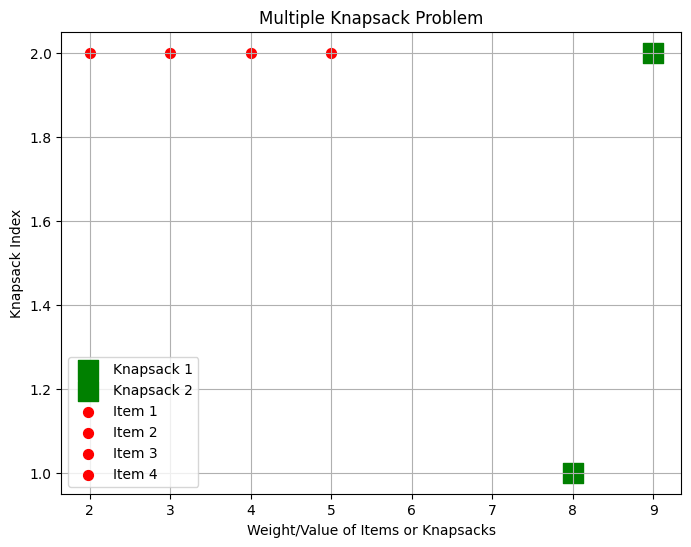

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def visualize_solution(items, knapsacks, best_solution):
    plt.figure(figsize=(8, 6))
    for i, knapsack in enumerate(knapsacks):
        plt.scatter([knapsack], [i + 1], color='green', marker='s', s=200, label=f'Knapsack {i + 1}')
    for j, item in enumerate(items):
        selected_knapsack = np.argmax(best_solution[j, :])
        plt.scatter([item], [selected_knapsack + 1], color='red', marker='o', s=50, label=f'Item {j + 1}')
    plt.xlabel('Weight/Value of Items or Knapsacks')
    plt.ylabel('Knapsack Index')
    plt.title('Multiple Knapsack Problem')
    plt.legend()
    plt.grid(True)
    plt.show()
num_items = 4
weights = np.array([2, 3, 4, 5])
values = np.array([3, 4, 5, 6])
num_knapsacks = 2
capacities = np.array([8, 9])
num_ants = 10
num_iterations = 100
alpha = 1.0
beta = 2.0
rho = 0.1
q0 = 0.9
best_solution, best_value = ant_colony_optimization(num_ants, num_iterations, alpha, beta, rho, q0, weights, values, capacities)
visualize_solution(weights, capacities, best_solution)

In [ ]:
import random
import pygraphviz as pgv
num_items = 10
num_knapsacks = 3
weights = [random.randint(1, 10) for _ in range(num_items)]
values = [random.randint(1, 10) for _ in range(num_items)]
knapsack_capacities = [15, 20, 25]
num_ants = 5
pheromone_decay = 0.1
alpha = 1.0
beta = 2.0
pheromones = [[1.0] * num_items for _ in range(num_knapsacks)]
def ant_colony_optimization(num_iterations):
    global pheromones
    for iteration in range(num_iterations):
        ant_solutions = []
        for ant in range(num_ants):
            solution = []
            for item in range(num_items):
                probabilities = [pheromones[k][item] ** alpha * (values[item] / weights[item]) ** beta for k in range(num_knapsacks)]
                total_probability = sum(probabilities)
                probabilities = [p / total_probability for p in probabilities]
                knapsack_choice = random.choices(range(num_knapsacks), probabilities)[0]
                solution.append(knapsack_choice)
            ant_solutions.append(solution)
        for k in range(num_knapsacks):
            for item in range(num_items):
                pheromones[k][item] *= (1.0 - pheromone_decay)
                for ant_solution in ant_solutions:
                    if ant_solution[item] == k:
                        pheromones[k][item] += 1.0
    return ant_solutions
num_iterations = 20
final_solutions = ant_colony_optimization(num_iterations)
graph = pgv.AGraph(directed=True)
for ant_solution in final_solutions:
    for item, knapsack in enumerate(ant_solution):
        graph.add_edge(f"Item {item}", f"Knapsack {knapsack}")
graph.layout(prog='dot')
graph.draw('MKP_ACO_Soln.png')

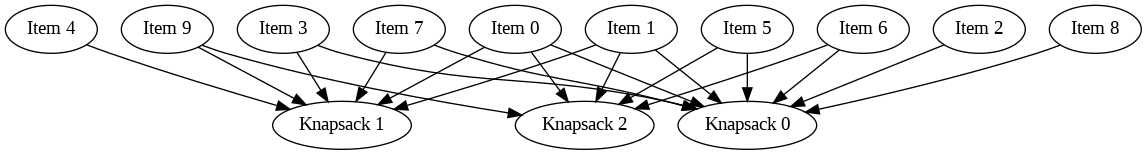

**`Maximum Independent Set Problem`**

In [ ]:
import networkx as nx
import random
import numpy as np
class AntColony:
    def __init__(self, graph, n_ants, alpha=1, beta=2, evaporation_rate=0.5, pheromone_deposit=1):
        self.graph = graph
        self.pheromone_matrix = nx.to_numpy_array(graph)
        self.n_ants = n_ants
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone_deposit = pheromone_deposit
    def run(self, max_iter):
        best_solution = None
        best_score = float('-inf')
        for _ in range(max_iter):
            solutions = self.generate_solutions()
            scores = [self.evaluate(solution) for solution in solutions]
            if max(scores) > best_score:
                best_score = max(scores)
                best_solution = solutions[scores.index(max(scores))]
            self.update_pheromones(solutions, scores)
        return best_solution
    def generate_solutions(self):
        solutions = []
        for _ in range(self.n_ants):
            solution = self.construct_solution()
            solutions.append(solution)
        return solutions
    def construct_solution(self):
        solution = set()
        for node in self.graph.nodes():
            if random.uniform(0, 1) < 0.5:
                solution.add(node)
        return solution
    def evaluate(self, solution):
        return len(solution)
    def update_pheromones(self, solutions, scores):
        for i in range(self.graph.number_of_nodes()):
            for j in range(self.graph.number_of_nodes()):
                self.pheromone_matrix[i, j] *= (1 - self.evaporation_rate)
                for k in range(self.n_ants):
                    if i in solutions[k] and j in solutions[k]:
                        self.pheromone_matrix[i, j] += self.pheromone_deposit / scores[k]
def main():
    G = nx.erdos_renyi_graph(10, 0.3)
    ant_colony = AntColony(G, n_ants=5)
    max_independent_set = ant_colony.run(max_iter=100)
    print("Maximum Independent Set =", max_independent_set)
if __name__ == "__main__":
    main()

Maximum Independent Set = {0, 1, 2, 3, 5, 6, 7, 8, 9}


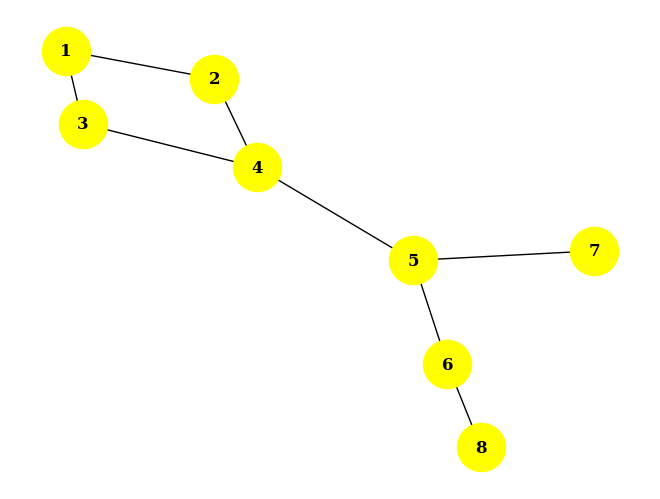

Enter the number of ants: 5
Enter the number of iterations: 100
Maximum Independent Set: {1, 2, 4, 5, 6, 7, 8}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
class AntColony:
    def __init__(self, graph, n_ants, alpha=1, beta=2, evaporation_rate=0.5, pheromone_deposit=1):
        self.graph = graph
        self.pheromone_matrix = nx.to_numpy_array(graph)
        self.n_ants = n_ants
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone_deposit = pheromone_deposit
    def run(self, max_iter):
        best_solution = None
        best_score = float('-inf')
        for _ in range(max_iter):
            solutions = self.generate_solutions()
            scores = [self.evaluate(solution) for solution in solutions]
            if max(scores) > best_score:
                best_score = max(scores)
                best_solution = solutions[scores.index(max(scores))]
            self.update_pheromones(solutions, scores)
        return best_solution
    def generate_solutions(self):
        solutions = []
        for _ in range(self.n_ants):
            solution = self.construct_solution()
            solutions.append(solution)
        return solutions
    def construct_solution(self):
        solution = set()
        for node in self.graph.nodes():
            if random.uniform(0, 1) < 0.5:
                solution.add(node)
        return solution
    def evaluate(self, solution):
        return len(solution)
    def update_pheromones(self, solutions, scores):
        for i in range(self.graph.number_of_nodes()):
            for j in range(self.graph.number_of_nodes()):
                self.pheromone_matrix[i, j] *= (1 - self.evaporation_rate)
                for k in range(self.n_ants):
                    if i in solutions[k] and j in solutions[k]:
                        self.pheromone_matrix[i, j] += self.pheromone_deposit / scores[k]
def draw_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=1200, node_color='yellow', font_color='black', font_size=12, width=1, font_family='serif')
    plt.show(block=False)
def main():
    edges = [(1, 2), (1, 3), (2, 4), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8)]
    G = nx.Graph(edges)
    draw_graph(G)
    n_ants = int(input("Enter the number of ants: "))
    max_iter = int(input("Enter the number of iterations: "))
    ant_colony = AntColony(G, n_ants=n_ants)
    max_independent_set = ant_colony.run(max_iter=max_iter)
    print("Maximum Independent Set:", max_independent_set)
    plt.pause(1)
    plt.close()
if __name__ == "__main__":
    main()